Nama : SEPTAVIA NAVIS

Kelas : DS4

## DAY 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path='/content/drive/MyDrive/DataSource/heatingOilTrainingset.csv'
df_dataset=pd.read_csv(path)
df_dataset

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2
...,...,...,...,...,...,...
1213,7,56,264,5,58.2,5
1214,5,78,129,1,22.5,1
1215,5,77,138,3,26.8,1
1216,3,89,156,2,34.0,2


In [3]:
df=pd.DataFrame(df_dataset)
df.head()

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2


### Business Understanding
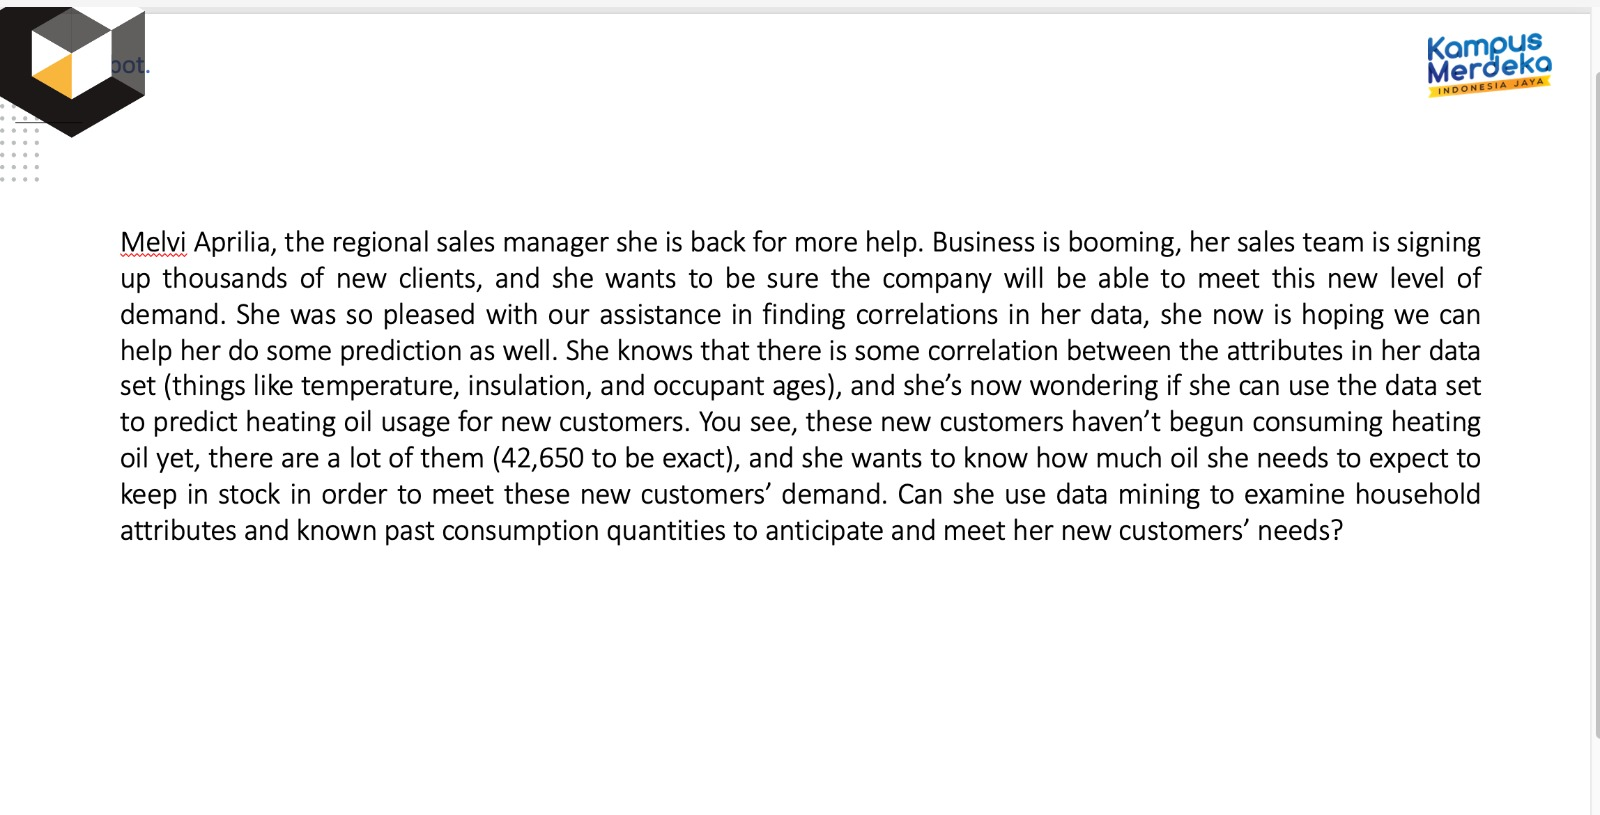

Melvi Aprilia, manajer penjualan regional, kembali untuk meminta bantuan. Bisnis sedang booming, tim penjualannya mendaftarkan ribuan klien baru, dan dia ingin memastikan bahwa perusahaan akan dapat memenuhi tingkat permintaan baru ini. Dia sangat senang dengan bantuan kami dalam menemukan korelasi dalam kumpulan datanya, dan sekarang dia berharap kami dapat membantunya melakukan beberapa prediksi juga. Dia tahu ada beberapa korelasi antara atribut dalam kumpulan datanya (hal-hal seperti suhu, insulasi, dan usia penghuni), dan dia sekarang bertanya apakah dia dapat menggunakan kumpulan data untuk memprediksi penggunaan minyak pemanas untuk pelanggan baru. Anda lihat, pelanggan baru ini belum mulai mengonsumsi minyak pemanas, ada banyak (42.650 untuk menjadi tepatnya), dan dia ingin tahu berapa banyak minyak yang dia perlu harapkan untuk menyimpan stok agar dapat memenuhi permintaan pelanggan baru ini. Bisakah dia menggunakan penambangan data untuk memeriksa atribut rumah tangga dan kuantitas konsumsi minyak masa lalu yang diketahui untuk mengantisipasi dan memenuhi kebutuhan pelanggan barunya?

**Case problem** : Estimasi

**Judul** :
- Penerapan Mesin Learning untuk mengamankan stok level heating oil menggunakan pendekatan analisa prediktif
- Predictive Stock Level Heating Oil

**Jenis Machine Learning** = Supervised Learning

**Data Training**:
Valid Historikal penjualan Heating Oil dengan merekap form pelanggan, insulation, temperature, av_age, home_size, num_of_occupant.

Kemungkinan algoritma estimasi yang akan digunakan:
1. Linear Regresion
2. MLP Regresor (Artificial Neural Network)

### Data Understanding

As a review, our data set from Chapter 4 contains the following attributes:

1. **Insulation**: This is a density rating, ranging from one to ten, indicating the thickness of each home’s insulation. A home with a density rating of one is poorly insulated, while a home with a density of ten has excellent insulation.

2. **Temperature**: This is the average outdoor ambient temperature at each home for the most recent year, measure in degree Fahrenheit.

3. **Heating_Oil**: This is the total number of units of heating oil purchased by the owner of each home in the most recent year.

4. **Num_Occupants**: This is the total number of occupants living in each home.

5. **Avg_Age**: This is the average age of those occupants.

6. **Home_Size**: This is a rating, on a scale of one to eight, of the home’s overall size. The higher the number, the larger the home

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     1218 non-null   int64  
 1   Temperature    1218 non-null   int64  
 2   Heating_Oil    1218 non-null   int64  
 3   Num_Occupants  1218 non-null   int64  
 4   Avg_Age        1218 non-null   float64
 5   Home_Size      1218 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 57.2 KB


In [5]:
df.isnull().sum()

Insulation       0
Temperature      0
Heating_Oil      0
Num_Occupants    0
Avg_Age          0
Home_Size        0
dtype: int64

Syarat dari penyelesaian problem estimasi : tidak ada variable kategorik
- tidak perlu melakukan konversi data, disebabkan semua variable numerik
- tidak perlu dilakukan handling missing value, disebabkan datanya bebas missing value

### TIDAK ADA DATA PREPARATION KARENA DATA TIDAK MISSING VALUE

### Data Modelling



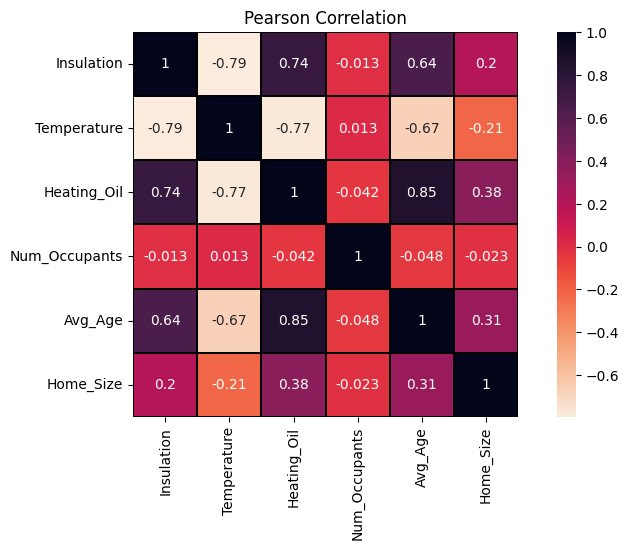

In [6]:
f,ax=plt.subplots(figsize=(10,5))
plt.title('Pearson Correlation')
sns.heatmap(
    df.astype(float).corr(),
    linewidth=0.25,
    vmax=1.0,
    square=True,
    cmap='rocket_r',
    linecolor='black',
    annot=True
)
plt.show()

In [7]:
# Menentukan input variabel
x=df[[
    'Insulation',
    'Temperature',
    'Num_Occupants',
    'Avg_Age',
    'Home_Size'
]]

# Menentuka target variabel
y=df['Heating_Oil']

In [8]:
# untuk split data kita menjadi training dan testing
from sklearn.model_selection import train_test_split
# untuk Linear model
from sklearn.linear_model import LinearRegression
# untuk evaluasi model
from sklearn import metrics

In [9]:
# split data menjadi train 70% dan test 30%
x_train, x_test, y_train, y_test=train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=0
)

In [10]:
x_train

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
579,6,75,5,24.1,3
1146,3,87,2,33.6,8
188,5,75,2,21.8,2
491,3,80,2,25.4,8
1217,7,59,1,61.4,5
...,...,...,...,...,...
1033,3,82,5,27.0,3
763,5,76,2,41.3,7
835,3,80,4,23.3,4
559,7,55,3,61.6,7


In [11]:
y_train

579     131
1146    156
188     131
491     134
1217    273
       ... 
1033    146
763     183
835     127
559     273
684     142
Name: Heating_Oil, Length: 852, dtype: int64

#### Linear Regression

In [12]:
reg=LinearRegression()

# Train model
model_reg=reg.fit(x_train,y_train)

In [13]:
# Prediksi dengan data test
y_pred_reg = model_reg.predict(x_test)

In [14]:
# Evaluation Linier Regression
print('r2_score: ', metrics.r2_score(y_test,y_pred_reg))

r2_score:  0.8113322126382521


In [15]:
# Membuat Script MAPE
def mean_absolute_percentage_error(y_true,y_pred):
  y_true,y_pred=np.array(y_true),np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

print('MAPE: ',mean_absolute_percentage_error(y_test,y_pred_reg))

MAPE:  7.845552048912459


- Hasil evaluasi pada model Linier Regression : BAIK
- R2 menunjukkan nilai 0.81 mendekati 1, artinya untuk menjadi excelent hanya kurang 0.2
- MAPE = 7.8 artinya tingkat error = 7.8% dan tingkat kesuksesan = 92.2%

#### MLP Regression (Artificial Neural Network)

In [16]:
from sklearn.neural_network import MLPRegressor

In [17]:
# Object MLP Regressor
mlp_reg=MLPRegressor(
    hidden_layer_sizes=(150,100,50),
    max_iter=1000
)
# Train model
model_mlp=mlp_reg.fit(x_train,y_train)

# Predict model
y_pred_mlp=model_mlp.predict(x_test)

In [18]:
# Evaluation MLP Regression
print('r2_score: ', metrics.r2_score(y_test,y_pred_mlp))

r2_score:  0.9258094844581249


In [19]:
print('MAPE: ',mean_absolute_percentage_error(y_test,y_pred_mlp))

MAPE:  5.008241085059568


Hasil evaluasi pemodelan Neural Network (MLP Regressor)

1. R2 = 0.92 dalam kategori cukup baik
2. MAPE = 5% artinya ketepatan model = 95%


Setelah melakukan Tunning parameter, maka model terbaik antara linier regression dan MLP Regressor adalah MLP Regressor karena memiliki MAPE 4.6% artinya tingkat kegagalan adalah 5% dengan tingkat keakuratan 95% dan R2 = 0.92

## DAY 2

### Implement Model to Machine Learnig

Model yg akan digunakan adalah MLP Regressor (ANN)

In [20]:
# Loading new customer dataset
path1='/content/drive/MyDrive/DataSource/heatingOilNewust.csv'
df_dataset1=pd.read_csv(path1)
df_dataset1

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7
...,...,...,...,...,...
42645,7,63,9,59.1,8
42646,7,84,1,43.6,5
42647,2,67,1,27.3,4
42648,8,58,1,65.7,3


In [21]:
df1=pd.DataFrame(df_dataset1)
df1

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7
...,...,...,...,...,...
42645,7,63,9,59.1,8
42646,7,84,1,43.6,5
42647,2,67,1,27.3,4
42648,8,58,1,65.7,3


In [22]:
df1.info()
# tidak ada field heating oil
# karena ini adalah data customer yg belum pernah melakukan pembelian

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42650 entries, 0 to 42649
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     42650 non-null  int64  
 1   Temperature    42650 non-null  int64  
 2   Num_Occupants  42650 non-null  int64  
 3   Avg_Age        42650 non-null  float64
 4   Home_Size      42650 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.6 MB


#### Data Preparation
Select input variabel

In [23]:
# Menentukan input variabel
x1=df1[[
    'Insulation',
    'Temperature',
    'Num_Occupants',
    'Avg_Age',
    'Home_Size'
]]
x1

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7
...,...,...,...,...,...
42645,7,63,9,59.1,8
42646,7,84,1,43.6,5
42647,2,67,1,27.3,4
42648,8,58,1,65.7,3


#### Applying model

In [24]:
y_predict_mlp=model_mlp.predict(x1)
y_predict_mlp

array([289.53015393, 165.57591505, 196.44685916, ..., 126.74561842,
       279.65016239, 229.91983872])

In [25]:
# Mengubah hasil pemodelan yg berbentuk Array ke Dataframe
df_y_predict_mlp=pd.DataFrame({'Prediction_HeatingOil':y_predict_mlp}).round(2)
df_y_predict_mlp

,Prediction_HeatingOil
0,289.53
1,165.58
2,196.45
3,225.05
4,155.79
...,...
42645,251.34
42646,186.16
42647,126.75
42648,279.65


In [26]:
# Menggabungkan dataset NewCustomer dengan Hasil Predict nya
df_hasil_predict_mlp=pd.concat([
    df1,
    df_y_predict_mlp],
    sort=False,
    axis=1
)
df_hasil_predict_mlp.head()

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size,Prediction_HeatingOil
0,5,69,10,70.1,7,289.53
1,5,80,1,66.7,1,165.58
2,4,89,9,67.8,7,196.45
3,7,81,9,52.4,6,225.05
4,4,58,8,22.9,7,155.79


In [27]:
# Export to excel
# Export as download if in colab
from google.colab import files

file_predict_heatingOil=df_hasil_predict_mlp.to_excel(
    'file_predict_heatingOil.xlsx',
    sheet_name='predict'
)
files.download('file_predict_heatingOil.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Jumlah stok yg dibutuhkan bu Melvi untuk coverage New Customer dan Old Customer

In [28]:
newCust=df_hasil_predict_mlp['Prediction_HeatingOil'].sum()
oldCust=df['Heating_Oil'].sum()
stock=newCust + oldCust

print('Stock tersedia: ', stock)
print('Kebutuhan NewCust: ', newCust)
print('Kebutuhan OldCust: ', oldCust)

Stock tersedia:  8733754.25
Kebutuhan NewCust:  8493328.25
Kebutuhan OldCust:  240426
